In [1]:
pip install pandas openpyxl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

# Load CSV files
brazil_df = pd.read_csv('amz_br_total_products_data_processed.csv')
canada_df = pd.read_csv('amz_ca_total_products_data_processed.csv')

# Data Preprocessing
brazil_df.rename(columns={
    'asin': 'ASIN',
    'title': 'Title',
    'imgUrl': 'Image URL',
    'productURL': 'Product URL',
    'stars': 'Stars',
    'reviews': 'Reviews',
    'price': 'Price',
    'listPrice': 'List Price',
    'categoryName': 'Category',
    'isBestSeller': 'Is Best Seller',
    'boughtInLastMonth': 'Bought In Last Month'
}, inplace=True)

canada_df.rename(columns={
    'asin': 'ASIN',
    'title': 'Title',
    'imgUrl': 'Image URL',
    'productURL': 'Product URL',
    'stars': 'Stars',
    'reviews': 'Reviews',
    'price': 'Price',
    'listPrice': 'List Price',
    'categoryName': 'Category',
    'isBestSeller': 'Is Best Seller',
    'boughtInLastMonth': 'Bought In Last Month'
}, inplace=True)

# Merge DataFrames on common columns, e.g., 'ASIN'
merged_df = pd.merge(brazil_df, canada_df, on='ASIN', suffixes=('_Brazil', '_Canada'))

# Comparison Analysis
comparison_results = {
    'Metric': [
        'Average Price', 
        'Average List Price', 
        'Average Stars', 
        'Average Reviews', 
        'Number of Best Sellers', 
        'Total Products Bought In Last Month', 
        'Max Price', 
        'Min Price', 
        'Price Range',
        'Average Price Difference'
    ],
    'Brazil': [
        brazil_df['Price'].mean(),
        brazil_df['List Price'].mean(),
        brazil_df['Stars'].mean(),
        brazil_df['Reviews'].mean(),
        brazil_df['Is Best Seller'].sum(),
        brazil_df['Bought In Last Month'].sum(),
        brazil_df['Price'].max(),
        brazil_df['Price'].min(),
        brazil_df['Price'].max() - brazil_df['Price'].min(),
        (brazil_df['Price'] - canada_df['Price'].mean()).mean()
    ],
    'Canada': [
        canada_df['Price'].mean(),
        canada_df['List Price'].mean(),
        canada_df['Stars'].mean(),
        canada_df['Reviews'].mean(),
        canada_df['Is Best Seller'].sum(),
        canada_df['Bought In Last Month'].sum(),
        canada_df['Price'].max(),
        canada_df['Price'].min(),
        canada_df['Price'].max() - canada_df['Price'].min(),
        (canada_df['Price'] - brazil_df['Price'].mean()).mean()
    ]
}

# Convert to DataFrame
comparison_results_df = pd.DataFrame(comparison_results)

# Save merged DataFrame and comparison results to CSV
merged_df.to_csv('merged_products_comparison.csv', index=False)
comparison_results_df.to_csv('comparison_results.csv', index=False)

print("Files saved: 'merged_products_comparison.csv' and 'comparison_results.csv'")


Files saved: 'merged_products_comparison.csv' and 'comparison_results.csv'


In [6]:
import pandas as pd

# Load the CSV files
brazil_data = pd.read_csv('amz_br_total_products_data_processed.csv')
canada_data = pd.read_csv('amz_ca_total_products_data_processed.csv')

# Merge the files on the 'ASIN' column
merged_data = pd.merge(brazil_data, canada_data, on='asin', suffixes=('_Brazil', '_Canada'))

# Save the merged file to a new CSV
merged_data.to_csv('merged_products_comparison.csv', index=False)

# Check if the data has been merged correctly
print(merged_data.head(10))


Empty DataFrame
Columns: [asin, title_Brazil, imgUrl_Brazil, productURL_Brazil, stars_Brazil, reviews_Brazil, price_Brazil, listPrice_Brazil, categoryName_Brazil, isBestSeller_Brazil, boughtInLastMonth_Brazil, title_Canada, imgUrl_Canada, productURL_Canada, stars_Canada, reviews_Canada, price_Canada, listPrice_Canada, categoryName_Canada, isBestSeller_Canada, boughtInLastMonth_Canada]
Index: []

[0 rows x 21 columns]


C:\Users\Aman\AppData\Local\Temp\ipykernel_19552\859128805.py:9: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed in 3.10.
  with PdfPages('merged_products_comparison.pdf') as pdf:


IndexError: index 0 is out of bounds for axis 0 with size 0

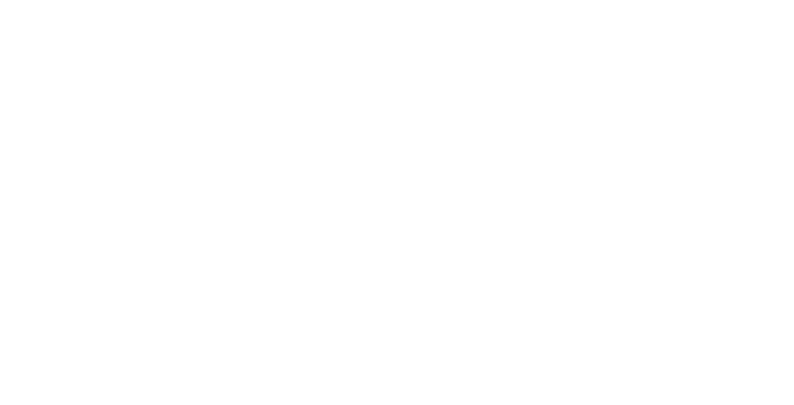

In [7]:
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Load the merged CSV file
merged_data = pd.read_csv('merged_products_comparison.csv')

# Convert the merged data to a PDF
with PdfPages('merged_products_comparison.pdf') as pdf:
    fig, ax = plt.subplots(figsize=(10, 5))  # Set figure size
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=merged_data.values, colLabels=merged_data.columns, cellLoc='center', loc='center')
    pdf.savefig(fig)
    plt.close()
